#Importar Pacotes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from  sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.image as mpimg

#Leitura e análise inicial dos dados

In [ ]:
df = pd.read_csv('/content/seguro saúde - insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
aux = pd.DataFrame({'colunas':df.columns, 'tipo':df.dtypes, 'missing': df.isna().sum(),'size':df.shape[0], 'unicos':df.nunique() })
aux ['percentual'] = round(aux['missing'] / aux['size'],2)
aux

,colunas,tipo,missing,size,unicos,percentual
age,age,int64,0,1338,47,0.0
sex,sex,object,0,1338,2,0.0
bmi,bmi,float64,0,1338,548,0.0
children,children,int64,0,1338,6,0.0
smoker,smoker,object,0,1338,2,0.0
region,region,object,0,1338,4,0.0
charges,charges,float64,0,1338,1337,0.0


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1337, 7)

#EDA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


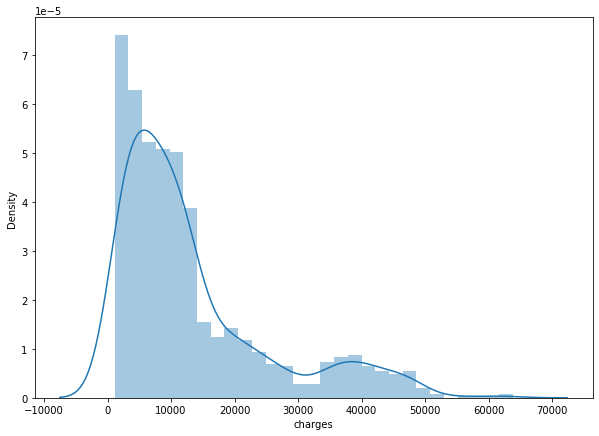

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(df.charges)
plt.show()
#distribuição dos dados target

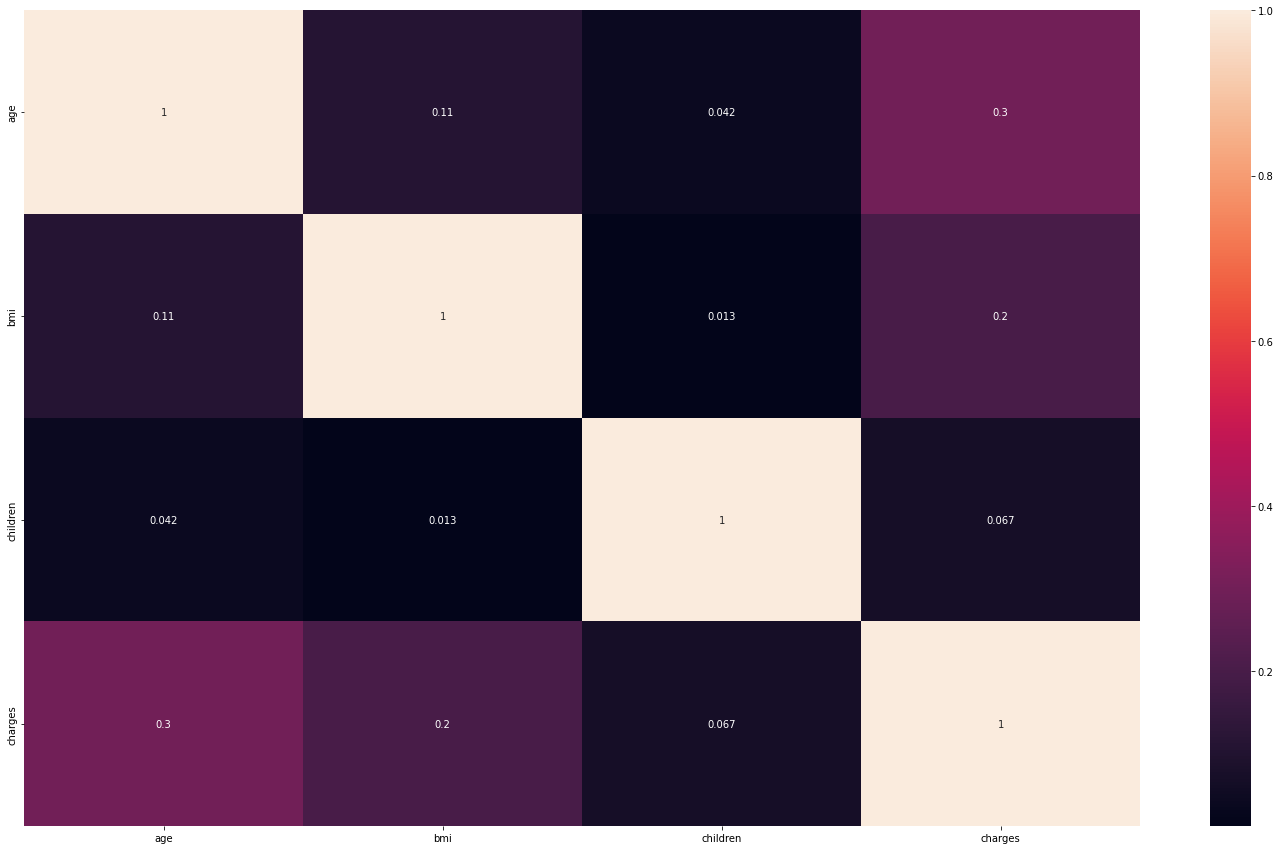

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), annot= True)
plt.show()

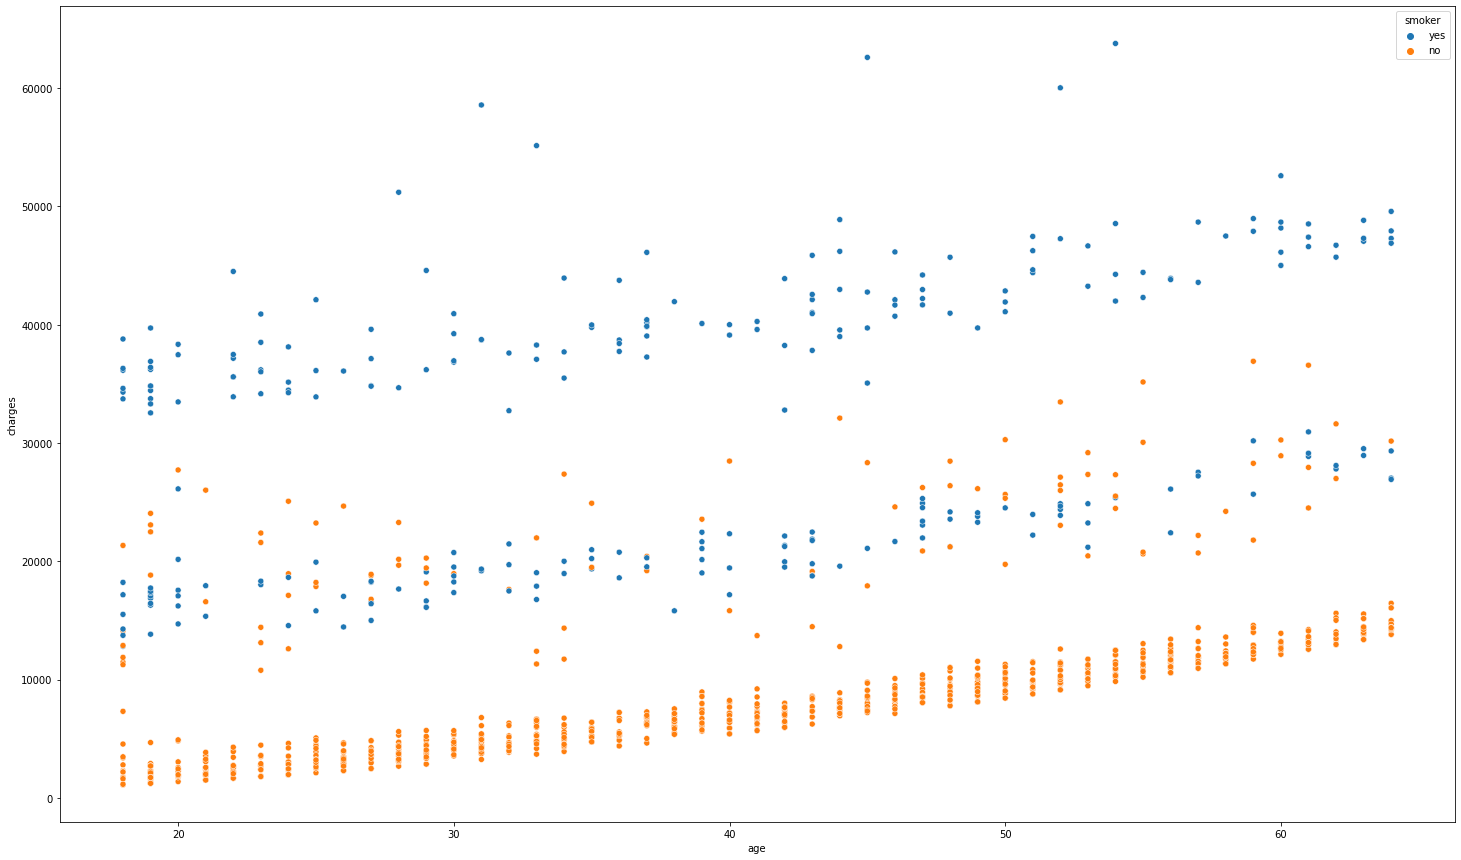

In [ ]:
plt.figure(figsize=(25,15))
sns.scatterplot(data=df, x='age',y='charges', hue='smoker')
plt.show()
#hue:separa uma categoria (ex:smoker --> yes or no)

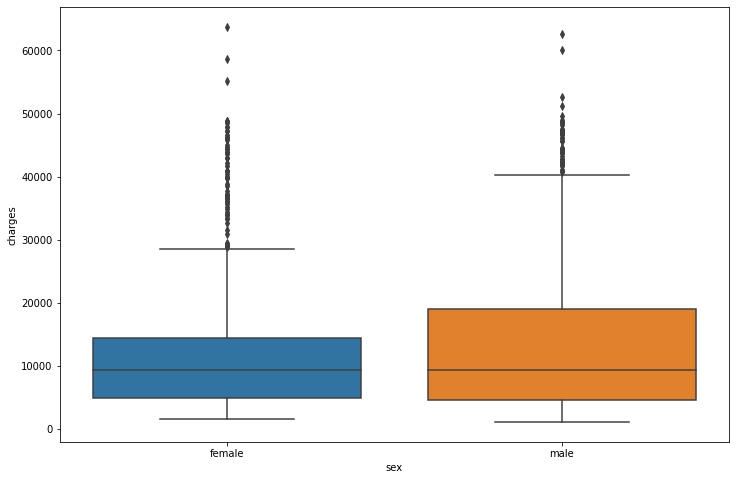

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='sex', y='charges')
plt.show()
#mostra a diferença de cobrança entre homens e mulheres

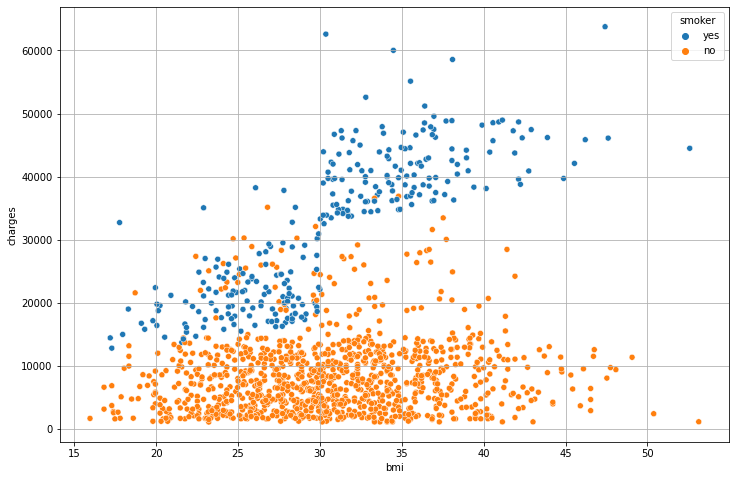

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='bmi',y='charges', hue='smoker')
plt.grid()
plt.show()

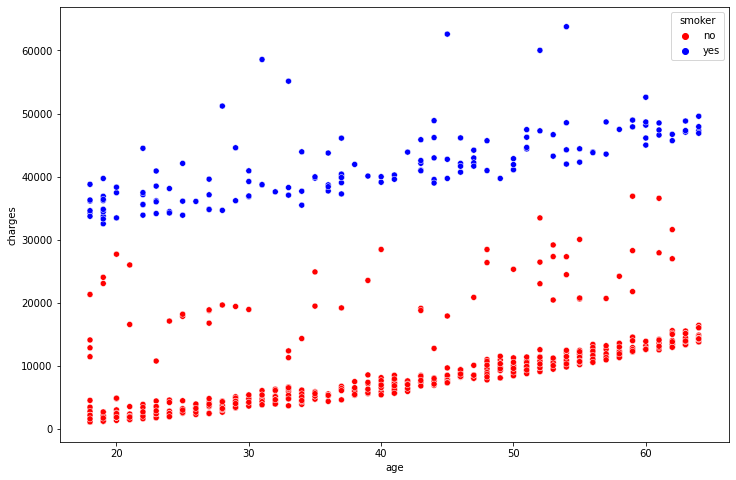

In [ ]:
plt.figure(figsize=(12,8))

sns.scatterplot(data=df[df['bmi']>30], x='age',y='charges', hue='smoker', palette=['red','blue'])

plt.show()

#One-hot encoding

In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
df= pd.get_dummies(df, drop_first=True)
#retira uma das categorias
#1= yes | 0= false

In [ ]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


#Separação

In [ ]:
#separação dados de treino e teste

In [ ]:
x = df.drop('charges',1)
y = df['charges']

In [ ]:
xtrain, xval, ytrain, yval = train_test_split(x,y , test_size = 0.3, random_state=42)

In [ ]:
xtrain.shape, ytrain.shape, xval.shape, yval.shape

((935, 8), (935,), (402, 8), (402,))

#Scaling

In [ ]:
scaler= MinMaxScaler()

In [ ]:
xtrain_scaled = scaler.fit_transform(xtrain)
xval_scaled = scaler.transform(xval)

xtrain_scaled = pd.DataFrame(xtrain_scaled,columns = xtrain.columns)
xval_scaled = pd.DataFrame(xval_scaled,columns = xval.columns)

In [ ]:
xtrain_scaled

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.782609,0.428840,0.6,0.0,0.0,0.0,1.0,0.0
1,0.804348,0.396153,0.0,1.0,1.0,0.0,0.0,0.0
2,0.152174,0.795803,0.4,1.0,1.0,0.0,1.0,0.0
3,0.630435,0.544256,0.0,1.0,1.0,0.0,1.0,0.0
4,0.630435,0.618241,0.4,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
930,0.717391,0.511165,0.4,0.0,1.0,0.0,0.0,0.0
931,0.195652,0.805488,0.4,1.0,0.0,0.0,0.0,1.0
932,0.043478,0.162497,0.2,1.0,0.0,0.0,0.0,1.0
933,0.434783,0.323917,0.6,0.0,0.0,0.0,0.0,1.0


#Modelagem

Regressão Linear

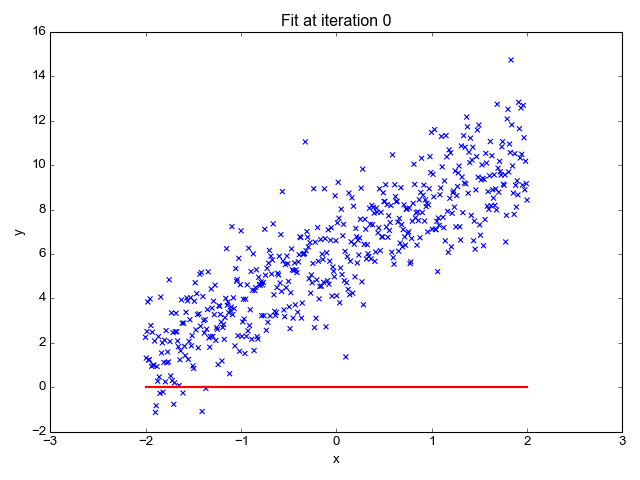

In [ ]:
from IPython.display import Image
Image (open('fit.gif', 'rb').read())

In [ ]:
lr = LinearRegression()

lr.fit(xtrain_scaled, ytrain)

LinearRegression()

In [ ]:
pred = lr.predict(xval_scaled)

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
mae(yval,pred)
#mostra o erro médio de valores

4181.815956942303

In [ ]:
from sklearn.metrics import mean_squared_error as mse
mse(yval,pred)
#mostra o erro ao quadrado dos valores

38940169.92282632

In [ ]:
# raiz do mse
np.sqrt(mse(yval,pred))

6240.205919905714

In [ ]:
from sklearn.metrics import r2_score as r2
r2 (yval,pred)
#mostra o quanto o modelo trás de valor, explica a variância melhor
#quanto mais próximo de 1 mais valores ele entrega

0.7724363518631285

In [ ]:
def report (yval,pred):
  print(f'MAE: {mae(yval,pred)}')
  print(f'MSE: {mae(yval,pred)}')
  print(f'RMSE: {np.sqrt(mse(yval,pred))}')
  print(f'R2: {r2(yval,pred)}')

report(yval,pred)

MAE: 4181.815956942303
MSE: 4181.815956942303
RMSE: 6240.205919905714
R2: 0.7724363518631285


In [ ]:
compare = pd.DataFrame(xval)
compare.reset_index(inplace=True, drop=True)
#comparação entre os valores reais e os valores preditivos
compare['yval'] = yval.values
compare['pred'] = pred
#através disso é possível entender pq o modelo errou

In [ ]:
compare.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,yval,pred
0,49,22.515,0,1,0,0,0,0,8688.85885,8075.919658
1,29,25.600,4,0,0,0,0,1,5708.86700,5499.002788
2,51,36.385,3,0,0,1,0,0,11436.73815,14345.712196
3,31,34.390,3,1,1,1,0,0,38746.35510,31428.203720
4,31,38.390,2,1,0,0,1,0,4463.20510,8874.781607


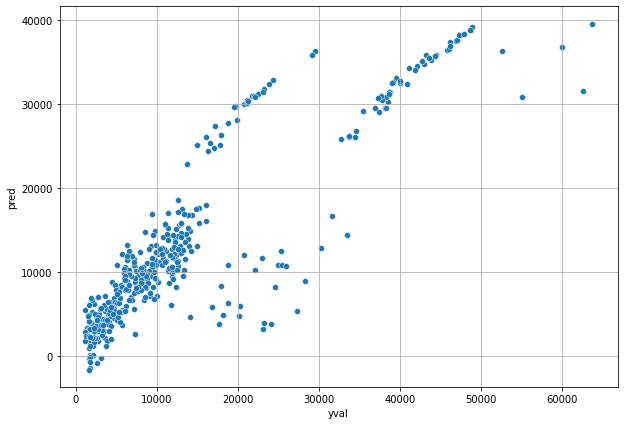

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=compare, x='yval',y='pred')
plt.grid()
plt.show()
#eixo x = dados de vlaidação (dados reais)
#eixo y = predição
#um gráfico perfeito seria uma linha reta nos eixos 

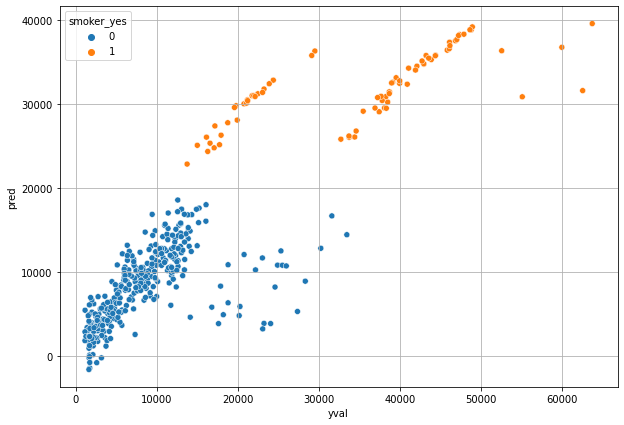

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=compare, x='yval',y='pred', hue='smoker_yes')
plt.grid()
plt.show()

#Com Feature Engineering

In [ ]:
#variável categórica que diz se o IMC é maior que 30 ou não
df['box > 30'] = 0
#cria uma coluna e chama todos os seus valores de 0
df.loc[df['bmi'] > 30, 'bmi > 30'] = 1
#filtra somente os IMC maiores que 30 

In [ ]:
x = df.drop('charges', 1)
y = df ['charges']

xtrain, xval, ytrain, yval = train_test_split(x, y, test_size = 0.3, random_state=42)

scaler = MinMaxScaler()

xtrain_scaled = scaler.fit_transform(xtrain)
xval_scaled = scaler.transform(xval)

xtrain_scaled= pd.DataFrame(xtrain_scaled, columns = xtrain.columns)
xval_scaled = pd.DataFrame(xval_scaled, columns = xval.columns)

In [ ]:
lr.fit(xtrain_scaled, ytrain)
pred = lr.predict(xval_scaled)

In [ ]:
report (yval, pred)

MAE: 4181.815956942303
MSE: 4181.815956942303
RMSE: 6240.205919905714
R2: 0.7724363518631285


#Random Forest

In [ ]:
rf = RandomForestRegressor()

rf.fit(xtrain_scaled, ytrain)
pred = rf.predict(xval_scaled)

In [ ]:
report (yval, pred)

MAE: 2589.1337339402985
MSE: 2589.1337339402985
RMSE: 4788.205983895004
R2: 0.8660166922828141


In [ ]:
compare = pd.DataFrame(xval)
compare.reset_index(inplace=True, drop=True)

compare ['yval'] = yval.values

In [ ]:
compare.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,yval
0,49,22.515,0,1,0,0,0,0,8688.85885
1,29,25.600,4,0,0,0,0,1,5708.86700
2,51,36.385,3,0,0,1,0,0,11436.73815
3,31,34.390,3,1,1,1,0,0,38746.35510
4,31,38.390,2,1,0,0,1,0,4463.20510


In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=compare, x='yval',y='pred', hue='smoker_yes')
plt.grid()
plt.show()
#mais próximo de uma linha reta, ou seja, os valores que tiveram bom acerto

ValueError: ignored

<Figure size 720x504 with 0 Axes>

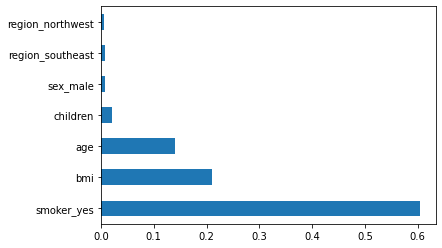

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index = x.columns)
feat_importances.nlargest(7).plot(kind = 'barh')
#mostra qual dado é mais relevante para o modelo